In [9]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

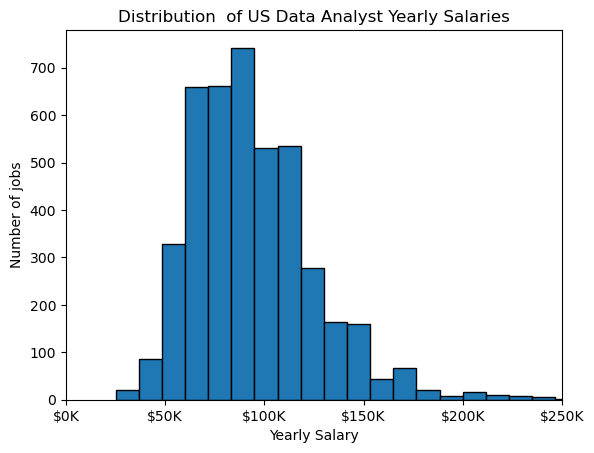

In [134]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution  of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.show()

Text(0.5, 0, 'Hourly Salary ')

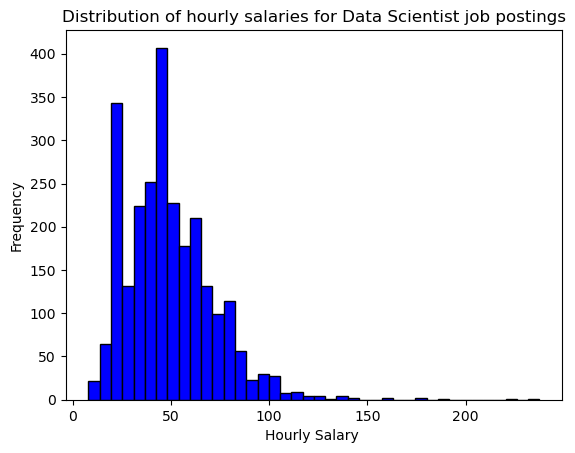

In [53]:
df_DS= df[df['job_title_short']== 'Data Scientist']

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, edgecolor='black', color='blue')
plt.title('Distribution of hourly salaries for Data Scientist job postings')
plt.xlabel('Hourly Salary ')

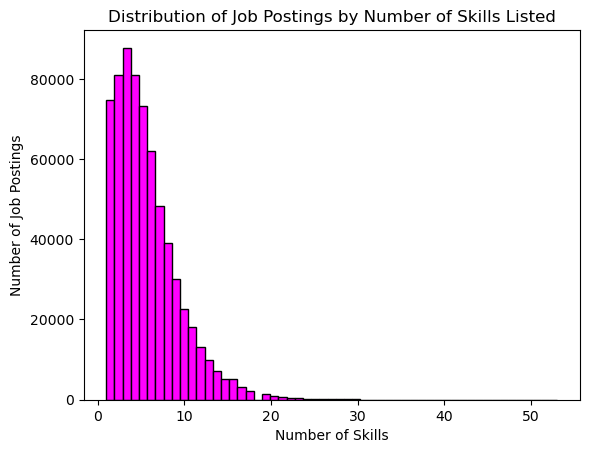

In [80]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

# Plot the histogram
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

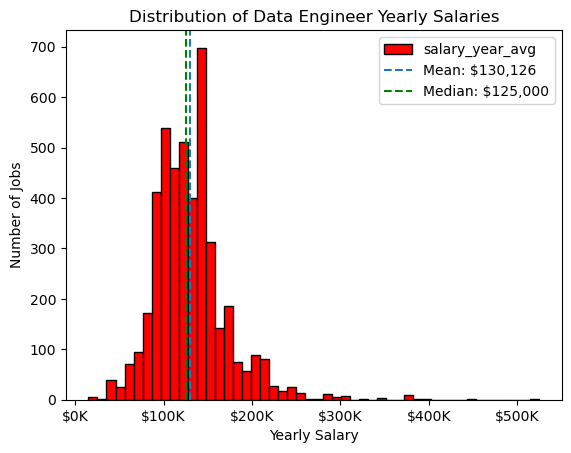

In [130]:
df_DE= df[df['job_title_short']=='Data Engineer'].copy()

salary = df_DE['salary_year_avg']
salary_mean = df_DE['salary_year_avg'].mean()
salary_median = df_DE['salary_year_avg'].median()

salary.plot(kind='hist', bins=50, edgecolor='black', color='red')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.axvline(salary_mean, label=f'Mean: ${salary_mean:,.0f}', linestyle='--')
plt.axvline(salary_median, label=f'Median: ${salary_median:,.0f}', color='green', linestyle='--')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()